<h1 style="font-size:4em; "> Max-Cut Problem </h1>

First, we need to import nessesory library 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

#helper function from utill
from utill import graph as ut


Let start the simple graph with 5 nodes

In [13]:
n = 5
G = nx.Graph()
V = range(n)
G.add_nodes_from(V)
E = [(0, 1, 1), (1, 2, 2), (2, 3, 3), (3, 0, 1), (1, 3, 5),(1, 4, 20)]
G.add_weighted_edges_from(E)

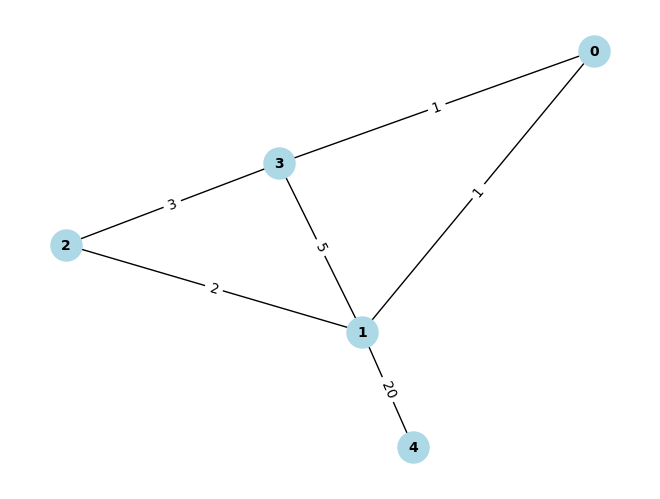

In [3]:
ut.draw_graph(G)

The MaxCut problem aims to determine how to partition (or "cut") the vertices of a graph into two disjoint subsets such that the sum of the weights of the edges crossing between the subsets is maximized.

For this graph, the maxcut bitstring is [1, 0, 0, 1, 1]

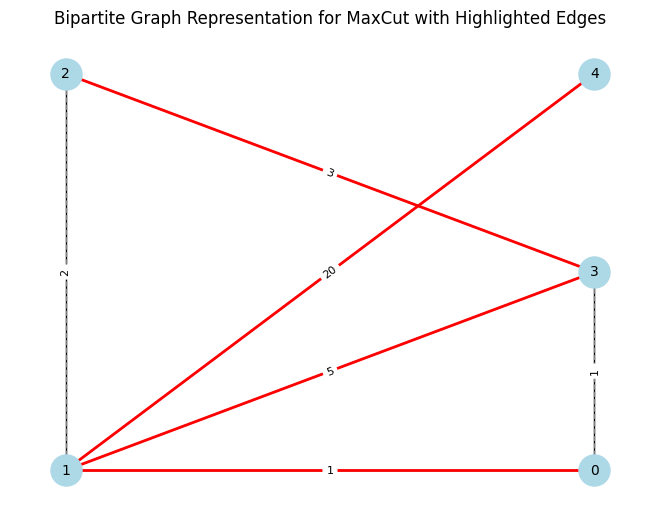

In [4]:
bitstring = [1, 0, 0, 1, 1]
ut.draw_partition_graph(G, bitstring)

So the final answer for maxcut is 29

<h1 style="font-size:3em; "> Tranform to QUBO </h1>

To generalize, Mathematical Formulation

# MaxCut Problem Formulation

Given an undirected graph $G = (V, E)$ with edge weights $w_{ij}$ for $(i, j) \in E$, the MaxCut problem can be formulated as:

$$
\text{Maximize: } \frac{1}{2} \sum_{(i, j) \in E} w_{ij} (1 - x_i x_j)
$$

**Subject to:**

$$
x_i \in \{-1, 1\} \quad \forall i \in V
$$

**Where:**

- $x_i \in \{-1, 1\}$: Indicates the set to which vertex $i$ belongs.
  - $x_i = 1$: Vertex $i$ is in one partition.
  - $x_i = -1$: Vertex $i$ is in the other partition.
- $w_{ij}$: The weight of the edge between vertices $i$ and $j$.


# QUBO Formulation for MaxCut

The **Quadratic Unconstrained Binary Optimization (QUBO)** formulation for the MaxCut problem can be described as follows:

Given an undirected graph $G = (V, E)$ with edge weights $w_{ij}$, the goal is to partition the vertices $V$ into two disjoint subsets $S$ and $T$ such that the weight of the cut is maximized.

### Variables
- Let $x_i \in \{0, 1\}$ for each vertex $i \in V$:
  - $x_i = 0$: Vertex $i$ is in one subset.
  - $x_i = 1$: Vertex $i$ is in the other subset.

### Objective Function
The objective function can be written as:

$$
\text{Maximize: } \sum_{(i, j) \in E} w_{ij} \, x_i (1 - x_j) + w_{ij} \, x_j (1 - x_i)
$$

This simplifies to:

$$
\text{Maximize: } \sum_{(i, j) \in E} w_{ij} \, x_i x_j - \frac{1}{2} \sum_{(i, j) \in E} w_{ij}.
$$

### QUBO Matrix Form
In QUBO, we minimize an energy function represented as:

$$
\text{Minimize: } H(x) = x^T Q x
$$

Where:
- $Q$ is the QUBO matrix,
- $x$ is the vector of binary variables.

For MaxCut:

$$
Q_{ij} =
\begin{cases}
-w_{ij} & \text{if } (i, j) \in E, \\
\sum_{(i, k) \in E} w_{ik} & \text{if } i = j, \\
0 & \text{otherwise.}
\end{cases}
$$

### Example 1

For a simple graph:

- **Graph:** $G = (V, E)$ with:
  - $V = \{1, 2, 3\}$,
  - $E = \{(1, 2), (2, 3)\}$,
  - Weights: $w_{12} = 3$, $w_{23} = 2$.



In [2]:
n = 3
G = nx.Graph()
V = range(1, n+1)
G.add_nodes_from(V)
E = [(1, 2, 3), (2, 3, 2)]
G.add_weighted_edges_from(E)

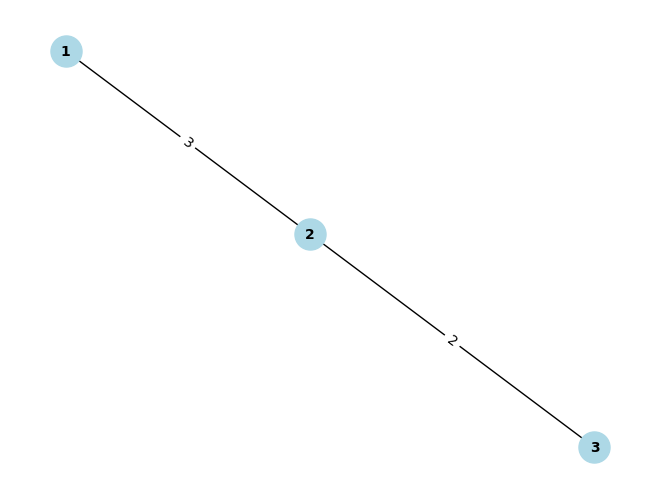

In [4]:
ut.draw_graph(G)

The QUBO matrix $Q$ is:

$$
Q =
\begin{bmatrix}
3 & -3 & 0 \\
-3 & 5 & -2 \\
0 & -2 & 2
\end{bmatrix}.
$$

There are useful function for tranform graph to QUBO

In [16]:
from qiskit_optimization.applications import Maxcut

For good understanding, I recommend to read white paper in resource "problem-formulation-guide.pdf"

First, let make adjacency matrix

In [4]:
w = nx.adjacency_matrix(G).todense()
print(w)

[[0 3 0]
 [3 0 2]
 [0 2 0]]


In [ ]:
max_cut = Maxcut(w) #maka max_cut object
qp = max_cut.to_quadratic_program() #make QUBO

print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -6*x_0*x_1 - 4*x_1*x_2 + 3*x_0 + 5*x_1 + 2*x_2

Subject to
  No constraints

  Binary variables (3)
    x_0 x_1 x_2



For Quadratic part

In [6]:
Quadratic = qp.objective.quadratic.to_array()
print(Quadratic)

[[ 0. -6.  0.]
 [ 0.  0. -4.]
 [ 0.  0.  0.]]


For Linear part

In [7]:
Linear = qp.objective.linear.to_array()
print(Linear)

[3. 5. 2.]


Therefore, the QUBO for this graph

In [8]:
print(ut.get_QUBO_Matrix(G))

[[ 3. -6.  0.]
 [ 0.  5. -4.]
 [ 0.  0.  2.]]


### Example 2

For a simple graph:

- **Graph:** $G = (V, E)$ with:
  - $V = \{0, 1, 2, 3, 4\}$,
  - $E = \{(0, 1), (1, 2), (2, 3), (0, 3), (1, 3), (1, 4)\}$,
  - Weights: $w_{01} = 1$, $w_{12} = 2$, $w_{23} = 3$, $w_{03} = 1$, $w_{13} = 5$, $w_{14} = 20$.

In [9]:
n = 5
G = nx.Graph()
V = range(n)
G.add_nodes_from(V)
E = [(0, 1, 1), (1, 2, 2), (2, 3, 3), (3, 0, 1), (1, 3, 5),(1, 4, 20)]
G.add_weighted_edges_from(E)

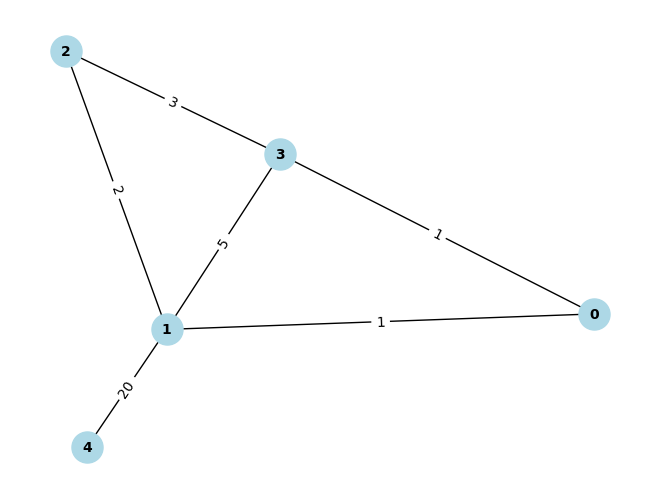

In [11]:
ut.draw_graph(G)

In [10]:
w = nx.adjacency_matrix(G).todense()
print(w)

[[ 0  1  0  1  0]
 [ 1  0  2  5 20]
 [ 0  2  0  3  0]
 [ 1  5  3  0  0]
 [ 0 20  0  0  0]]


In [11]:
max_cut = Maxcut(w) #maka max_cut object
qp = max_cut.to_quadratic_program() #make QUBO

print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_3 - 4*x_1*x_2 - 10*x_1*x_3 - 40*x_1*x_4 - 6*x_2*x_3
  + 2*x_0 + 28*x_1 + 5*x_2 + 9*x_3 + 20*x_4

Subject to
  No constraints

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



In [12]:
print(ut.get_QUBO_Matrix(G))

[[  2.  -2.   0.  -2.   0.]
 [  0.  28.  -4. -10. -40.]
 [  0.   0.   5.  -6.   0.]
 [  0.   0.   0.   9.   0.]
 [  0.   0.   0.   0.  20.]]


<h1 style="font-size:3em; "> Solve Problem </h1>

first, we will solve with classical optimizer

### Gurobi

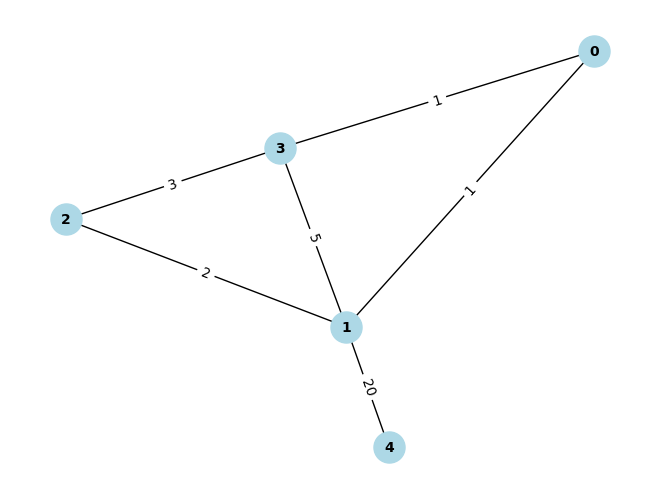

In [4]:
n = 5
G = nx.Graph()
V = range(n)
G.add_nodes_from(V)
E = [(0, 1, 1), (1, 2, 2), (2, 3, 3), (3, 0, 1), (1, 3, 5),(1, 4, 20)]
G.add_weighted_edges_from(E)
ut.draw_graph(G)

In [5]:
Q = ut.get_QUBO_Matrix(G)
print(Q)

[[  2.  -2.   0.  -2.   0.]
 [  0.  28.  -4. -10. -40.]
 [  0.   0.   5.  -6.   0.]
 [  0.   0.   0.   9.   0.]
 [  0.   0.   0.   0.  20.]]


In [6]:
from gurobi_optimods.qubo import solve_qubo

In [9]:
result = solve_qubo(-Q, solver_params={'MIPGap': 0.01})
print(result.objective_value)
print(result.solution)

New QUBO solution found with objective 0.0
New QUBO solution found with objective -29.0
-29.0
[1. 0. 0. 1. 1.]


### Fixstar

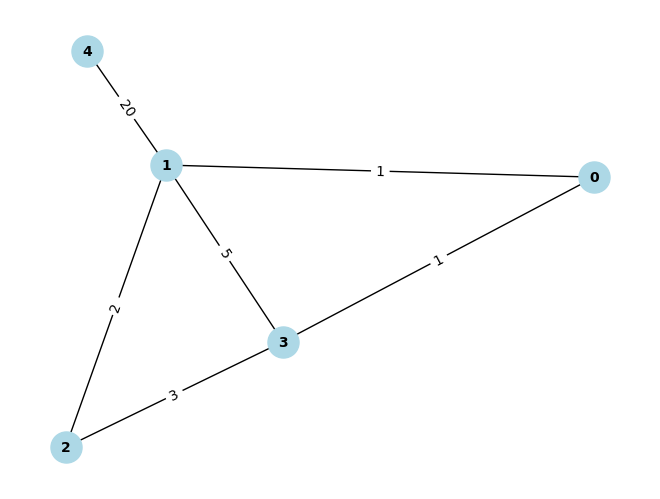

In [10]:
n = 5
G = nx.Graph()
V = range(n)
G.add_nodes_from(V)
E = [(0, 1, 1), (1, 2, 2), (2, 3, 3), (3, 0, 1), (1, 3, 5),(1, 4, 20)]
G.add_weighted_edges_from(E)
ut.draw_graph(G)

For Fixstar, we need to construct Qudratic part and Linear part seperately

In [17]:
w = nx.adjacency_matrix(G).todense()
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
Quadratic = qp.objective.quadratic.to_array()
Linear = qp.objective.linear.to_array()

In [13]:
from amplify import FixstarsClient, solve, VariableGenerator
from datetime import timedelta

get key token for Amplify

In [14]:
client = FixstarsClient()
client.token = "AE/7w4MdsQpCQq2C9t2wJEMvC9izCkVN2kr"
client.parameters.timeout = timedelta(milliseconds=1000)
client.parameters.outputs.num_outputs = 0

Construct Module. For detail https://amplify.fixstars.com/en/docs/amplify/v1/index.html

In [18]:
gen = VariableGenerator()
m = gen.matrix("Binary", n)
m.quadratic = -Quadratic
m.linear = -Linear
result = solve(m, client)

In [21]:
print("execution time : " + str(result.execution_time))
q = m.variable_array
print(f"solution : {q.evaluate(result.best.values)}")
print(f"objective = {-result.best.objective}")
print(m)


execution time : 0:00:00.948004
solution : [0. 0. 0. 1. 1.]
objective = 29.0
(x^T) Q x + (p^T) x + c
where:
  x = [q_0, q_1, q_2, q_3, q_4],
  Q = [[ -0.,   2.,  -0.,   2.,  -0.],
       [ -0.,  -0.,   4.,  10.,  40.],
       [ -0.,  -0.,  -0.,   6.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.]],
  p = [ -2., -28.,  -5.,  -9., -20.],
  c = 0
